In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Robot():

    def __init__(self, pos, vel, dt=1) -> None:
        self.pos = pos
        self.gps_vel = vel
        self.enc_vel = vel
        self.dt =dt
    
    def advance(self):
        pos0 = self.pos
        self.pos += (np.random.rand() * 0.1)
        self.gps_vel = (self.pos - pos0)/self.dt

    def get_gps_vel(self):

        return self.gps_vel

    def get_enc_vel(self):

        self.enc_vel = self.gps_vel * (1+np.random.rand())
        return self.enc_vel
    
    def __str__(self) -> str:
        return f"pos: {self.pos}, gps vel: {self.gps_vel}, enc vel: {self.enc_vel}"

In [3]:
length = 10
block_size = 1

In [4]:
grid = np.arange(0,length+block_size,1)

In [5]:
grid

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
def get_grid_x(pos, grid):
    return np.where(pos >= grid)[0][-1] -1

In [7]:
map = [[] for i in range(length)]

In [8]:
n_robots = 3

In [9]:
colors = ['red','green','blue']

In [10]:
robots = [Robot(0+(1.5*i), 0) for i in range(n_robots)]

pos: 0.0, gps vel: 0, enc vel: 0 ; grid:  -1
pos: 1.5, gps vel: 0, enc vel: 0 ; grid:  0
pos: 3.0, gps vel: 0, enc vel: 0 ; grid:  2


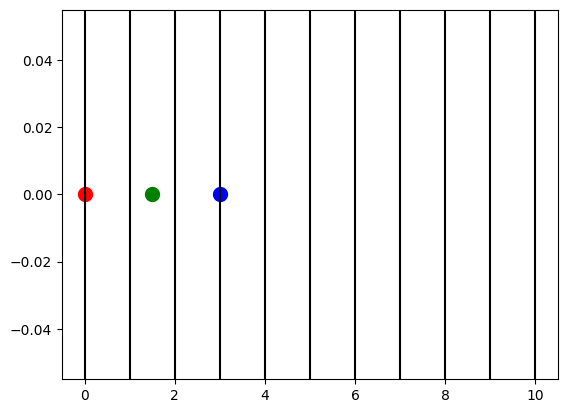

In [11]:
for b in grid:
    plt.axvline(b, color='black')
for i, r in enumerate(robots):
    print(r,'; grid: ',get_grid_x(r.pos,grid))
    plt.scatter(r.pos,0, linewidths=5, color=colors[i])
plt.show()

In [12]:
# stop_sim = not all([r.pos > length for r in robots])
# while stop_sim:
#     for b in grid:
#         plt.axvline(b, color='black')
#     for i, r in enumerate(robots):
#         if r.pos < length:
#             r.advance()
#             idx = get_grid_x(r.pos, grid)
#             slippage = r.get_gps_vel() - r.get_enc_vel()
#             map[idx].append(slippage)
#         plt.scatter(r.pos,0, linewidths=5, color=colors[i])

#     plt.show()
#     stop_sim = not all([r.pos > length for r in robots])

stop_sim = not all([r.pos > length for r in robots])
while stop_sim:
    # for b in grid:
        # plt.axvline(b, color='black')
    for i, r in enumerate(robots):
        if r.pos < length:
            r.advance()
            idx = get_grid_x(r.pos, grid)
            slippage = r.get_gps_vel() - r.get_enc_vel()
            map[idx].append(slippage)
        # plt.scatter(r.pos,0, linewidths=5, color=colors[i])

    # plt.show()
    stop_sim = not all([r.pos > length for r in robots])

pos: 10.024504647439148, gps vel: 0.07378551830140978, enc vel: 0.12154177334407557 ; grid:  9
pos: 10.032014097145026, gps vel: 0.07235765688056084, enc vel: 0.12433068443585717 ; grid:  9
pos: 10.047600866541499, gps vel: 0.06797835169680155, enc vel: 0.09380065910942324 ; grid:  9


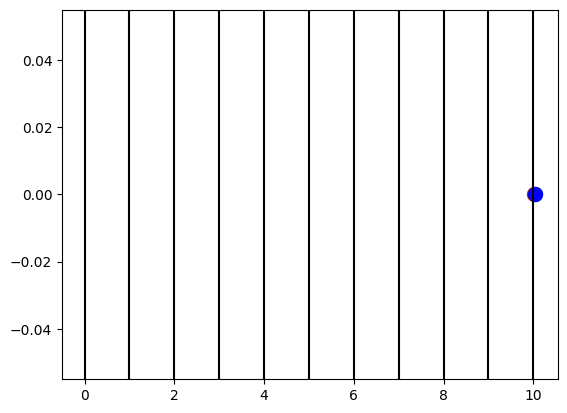

In [13]:
for b in grid:
    plt.axvline(b, color='black')
for i, r in enumerate(robots):
    print(r,'; grid: ',get_grid_x(r.pos,grid))
    plt.scatter(r.pos,0, linewidths=5, color=colors[i])
plt.show()

In [14]:
slipage_map = np.array([np.mean(s) for s in map])

In [15]:
slipage_map

array([-0.02007816, -0.02700028, -0.02685266, -0.02381532, -0.02411606,
       -0.02465831, -0.02489718, -0.02493108, -0.02395092, -0.02602861])

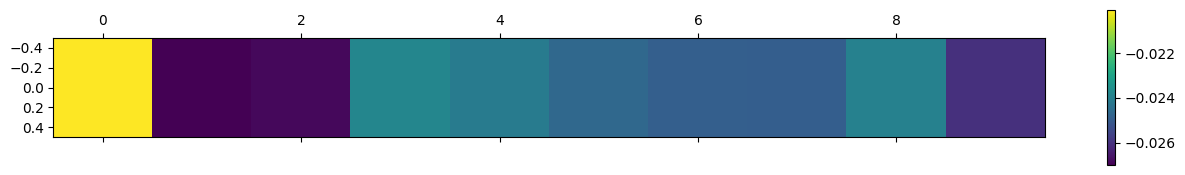

In [16]:
plt.matshow(slipage_map.reshape(-1,10))
plt.colorbar()
plt.show()

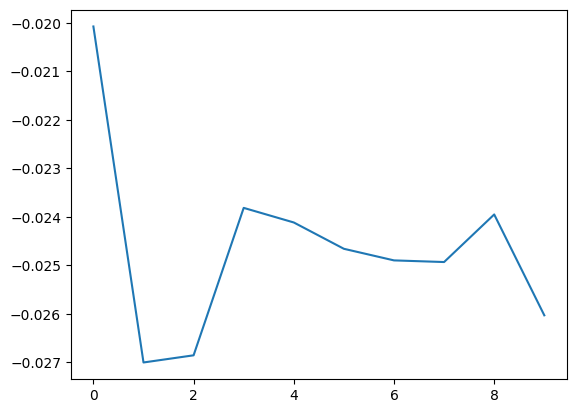

In [18]:
plt.plot(slipage_map)
plt.show()